In [1]:
import requests
import pandas as pd
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
GRT_QUERY_ENDPOINT = "https://api.thegraph.com/subgraphs/name/benber86/convex-pools"

In [3]:
def grt_query(query):
    r = requests.post(GRT_QUERY_ENDPOINT, json={'query': query})
    return r.json()

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## General pools info

In [5]:
query = """
{
  pools(
  orderBy:creationDate
  orderDirection: asc) {
    name
    id
    lpToken
    lpTokenBalance
    gauge
    crvRewardsPool
    swap
    stash
    assetType
    apr
    tvl
    creationDate
  }
}
"""

In [6]:
data = grt_query(query)

In [8]:
df = pd.DataFrame.from_dict(data['data']['pools'])
df['creationDate'] = pd.to_datetime(df['creationDate'],unit='s')
df['tvl'] = df['tvl'].astype(float)
df['apr'] = df['apr'].astype(float)
cols = df.columns.tolist()
first_columns = ['id', 'name', 'creationDate', 'apr', 'tvl']
cols = first_columns + [_ for _ in cols if _ not in first_columns]
df = df.reindex(columns=cols)
df

,id,name,creationDate,apr,tvl,assetType,crvRewardsPool,gauge,lpToken,lpTokenBalance,stash,swap
0,0,compound,2021-05-17 10:51:03,0.07232,83635989.81392,0,0xf34dff761145ff0b05e917811d488b441f33a968,0x7ca5b0a2910b33e9759dc7ddb0413949071d7575,0x845838df265dcd2c412a1dc9e959c7d08537f8a2,77446029822935169246169459,0x0000000000000000000000000000000000000000,0xa2b47e3d5c44877cca798226b7b8118f9bfb7a56
1,1,usdt,2021-05-17 10:51:36,0.67229,635997.01013,0,0x8b55351ea358e5eda371575b031ee24f462d503e,0xbc89cd85491d81c6ad2954e6d0362ee29fca8f53,0x9fc689ccada600b6df723d9e47d84d76664a1f23,587037281965777013097958,0x0000000000000000000000000000000000000000,0x52ea46506b9cc5ef470c5bf89f17dc28bb35d85c
2,2,y,2021-05-17 10:51:52,0.89476,35026780.48093,0,0xd802a8351a76ed5ecd89a7502ca615f2225a585d,0xfa712ee4788c042e2b7bb55e6cb8ec569c4530c1,0xdf5e0e81dff6faf3a7e52ba697820c5e32d806a8,31484031889322608145612173,0x0000000000000000000000000000000000000000,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51
3,3,busd,2021-05-17 11:00:54,0.03695,11280700.96040,0,0x602c4cd53a715d8a7cf648540fab0d3a2d546560,0x69fb7c45726cfe2badee8317005d3f94be838840,0x3b3ac5386837dc563660fb6a0937dfaa5924333b,10091110462348950079166234,0x0000000000000000000000000000000000000000,0x79a8c46dea5ada233abaffd40f3a0a2b1e5a4f27
4,4,susd,2021-05-17 11:02:43,0.04477,41161573.07952,0,0x22ee18aca7f3ee920d01f25da85840d12d98e8ca,0xa90996896660decc6e997655e065b23788857849,0xc25a3a3b969415c80451098fa907ec722572917f,39507671404038593406220554,0xd2f2b9504ef708b9f3bc53f1525353baae1b17e4,0xa5407eae9ba41422680e2e00537571bcc53efbfd
5,5,pax,2021-05-17 11:03:13,0.05632,988666.25233,0,0xe3daafc8c14147d5b4a7a56f0bfded240158e51e,0x64e3c23bfc40722d3b649844055f1d51c1ac041d,0xd905e2eaebe188fc92179b6350807d8bd91db0d8,955179634581517216889644,0x0000000000000000000000000000000000000000,0x06364f10b501e868329afbc005b3492902d6c763
6,6,ren,2021-05-17 11:03:52,0.00000,3820.68963,0,0x8e299c62eed737a5d5a53539df37b5356a27b07d,0xb1f2cdec61db658f091671f5f199635aef202cac,0x49849c98ae39fff122806c06791fa73784fb3675,3755749662062184571264,0x0000000000000000000000000000000000000000,0x93054188d876f558f4a66b2ef1d97d16edf0895b
7,7,sbtc,2021-05-17 11:05:01,0.00001,1538.32418,0,0xd727a5a6d1c7b31ff9db4db4d24045b7df0cff93,0x705350c4bcd35c9441419ddd5d2f097d7a55410f,0x075b1bb99792c9e1041ba13afef80c91a1e70fb3,1524865878478013738154,0x7b3ee538398829c96e4b187216c7ab2946a620c4,0x7fc77b5c7614e1533320ea6ddc2eb61fa00a9714
8,8,hbtc,2021-05-17 11:06:06,0.00000,3459.03978,0,0x618bd6cba676a46958c63700c04318c84a7b7c0a,0x4c18e409dc8619bfb6a1cb56d114c3f592e0ae79,0xb19059ebb43466c323583928285a49f558e572fd,3435385188788445650407,0x0000000000000000000000000000000000000000,0x4ca9b3063ec5866a4b82e437059d2c43d1be596f
9,9,3pool,2021-05-17 11:06:59,0.04517,76022939.19078,0,0x689440f2ff927e1f24c72f1087e1faf471ece1c8,0xbfcf63294ad7105dea65aa58f8ae5be2d9d0952a,0x6c3f90f043a72fa612cbac8115ee7e52bde6e490,74670288501369405743203699,0x0000000000000000000000000000000000000000,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7


## Historical TVL (USD)

In [9]:
query = """
{
    dailyPoolSnapshots(
        where: {poolid: 0}
        orderBy:timestamp
        orderDirection: asc) 
    {
        tvl
        timestamp
    }
}

"""

In [10]:
data = grt_query(query)

In [11]:
df = pd.DataFrame.from_dict(data['data']['dailyPoolSnapshots'])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df['tvl'] = df['tvl'].astype(float)
df

,timestamp,tvl
0,2021-05-17,102168.07124
1,2021-05-18,1046037.09025
2,2021-05-19,2854277.89610
3,2021-05-20,2903482.24194
4,2021-05-21,3308909.74125
...,...,...
57,2021-07-17,81214965.52997
58,2021-07-18,83636138.04322
59,2021-07-19,83626771.47491
60,2021-07-20,83262341.41056


<AxesSubplot:xlabel='timestamp'>

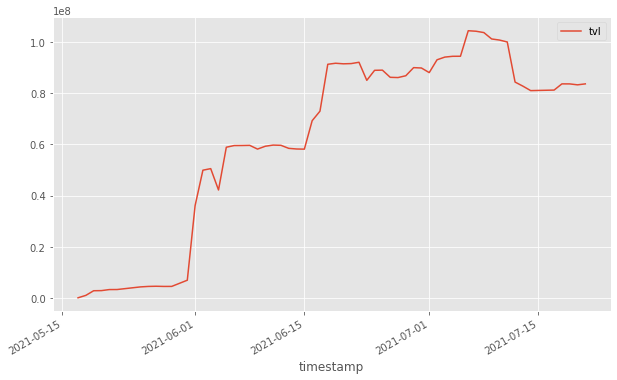

In [12]:
df.plot(x='timestamp', y='tvl', figsize=(10,6))

## Historical TVL (lpTokens)

In [13]:
query = """
{
    dailyPoolSnapshots(
        where: {poolid: 0}
        orderBy:timestamp
        orderDirection: asc) 
    {
        lpTokenBalance
        timestamp
    }
}

"""

In [14]:
data = grt_query(query)
df = pd.DataFrame.from_dict(data['data']['dailyPoolSnapshots'])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df['lpTokenBalance'] = df['lpTokenBalance'].astype(float)
df

,lpTokenBalance,timestamp
0,94997332790007717429248.00000,2021-05-17
1,972521732410182234800128.00000,2021-05-18
2,2653424300347476437630976.00000,2021-05-19
3,2698854528042548575862784.00000,2021-05-20
4,3075364202593487125741568.00000,2021-05-21
...,...,...
58,77458148550565782492282880.00000,2021-07-18
59,77447998550565777238392832.00000,2021-07-19
60,77106954986981923837968384.00000,2021-07-20
61,77446029822935176189050880.00000,2021-07-21


<AxesSubplot:xlabel='timestamp'>

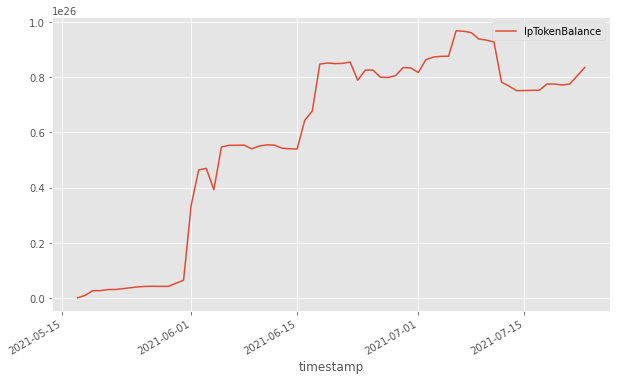

In [15]:
df.plot(x='timestamp', y='lpTokenBalance', figsize=(10,6))

## Historical APR

In [16]:
query = """
{
    dailyPoolSnapshots(
        where: {poolid: 5}
        orderBy:timestamp
        orderDirection: asc) 
    {
        apr
        timestamp
    }
}

"""

In [17]:
data = grt_query(query)

In [18]:
df = pd.DataFrame.from_dict(data['data']['dailyPoolSnapshots'])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df['apr'] = df['apr'].astype(float) * 100
df['apr'] = df['apr'].apply(lambda x: 0 if x > 300 else x) # bug w/ several pool. apr calculus issue ?
df

,apr,timestamp
0,0.00000,2021-05-18
1,0.00000,2021-05-19
2,4.46050,2021-05-24
3,6.50610,2021-05-25
4,5.00628,2021-05-31
5,8.63424,2021-06-02
6,9.79647,2021-06-05
7,9.44119,2021-06-06
8,9.11315,2021-06-07
9,7.88430,2021-06-09


<AxesSubplot:xlabel='timestamp'>

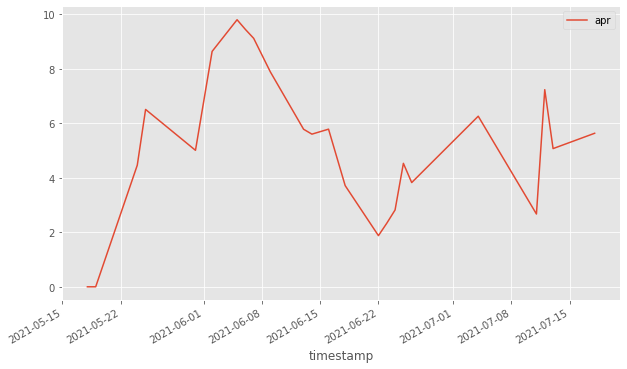

In [19]:
df.plot(x='timestamp', y='apr', figsize=(10,6))

## Deposits vs Withdrawals

In [20]:
query = """
{
    dailyPoolSnapshots(
        where: {poolid: 3}
        orderBy:timestamp
        orderDirection: asc) 
    {
        withdrawalValue
        depositValue
        timestamp
    }
}

"""

In [21]:
data = grt_query(query)

In [23]:
df = pd.DataFrame.from_dict(data['data']['dailyPoolSnapshots'])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s').dt.strftime('%Y-%m-%d')
df['depositValue'] = df['depositValue'].astype(float)
df['withdrawalValue'] = df['withdrawalValue'].astype(float)
df

,depositValue,timestamp,withdrawalValue
0,3984.75601,2021-06-03,0.00000
1,7631700.28081,2021-06-04,0.00000
2,10859.04678,2021-06-05,0.00000
3,9005.65833,2021-06-06,32367.17189
4,18051.26759,2021-06-07,0.00000
5,4294.94266,2021-06-09,3135.86924
6,2363022.79823,2021-06-10,0.00000
7,99535.18075,2021-06-11,0.00000
8,60341.12393,2021-06-12,308181.20304
9,389002.83134,2021-06-13,27033.89929


(1, 197589818.98674905)

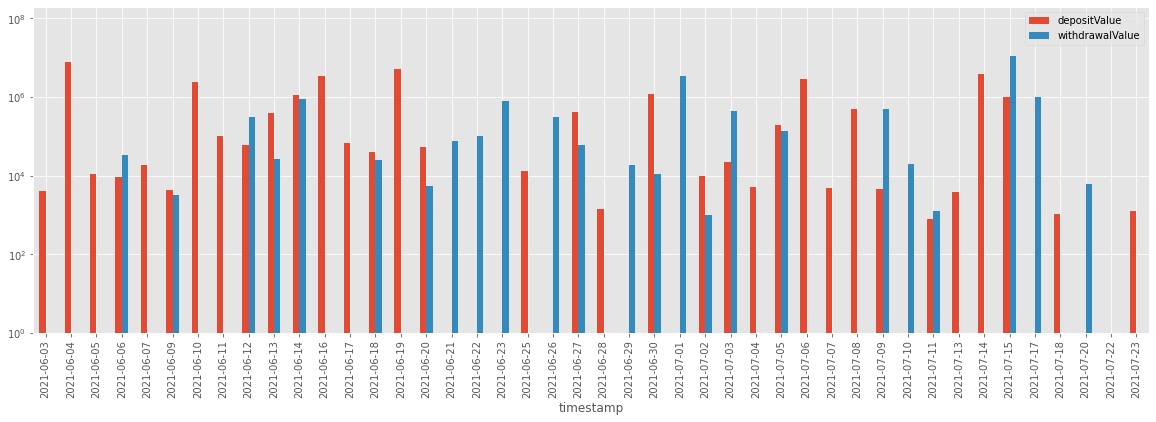

In [24]:
ax = df.plot.bar(x='timestamp', figsize=(20,6), logy=True)
ax.set_ylim(ymin=1)